In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key &quot;text.kerning_factor&quot; on line 4 in
/home/bench/miniconda3/envs/automl/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [16]:
test = pd.read_csv("./TomWilliams/y_test_IoT_Botnet.csv")
pred_Tpot = pd.read_csv("y_pred_IoT_Botnet_Tpot.csv")
pred_MLBox = pd.read_csv("y_pred_IoT_Botnet_MLBox.csv")
pred_H2O = pd.read_csv("y_pred_IoT_Botnet_H2O.csv")
pred_sklearn = pd.read_csv("y_pred_IoT_Botnet_Auto_sklearn.csv")

test = test.attack
pred_Tpot = pred_Tpot["0"]
pred_MLBox = pred_MLBox["attack_predicted"]
pred_H2O = round(pred_H2O["predict"])
pred_sklearn = pred_sklearn["0"]

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



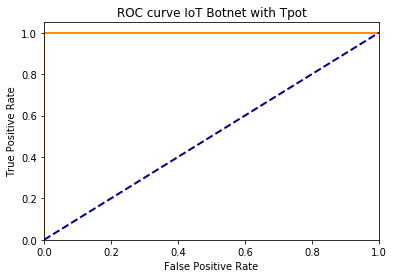

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa30b9cb8d0&gt;

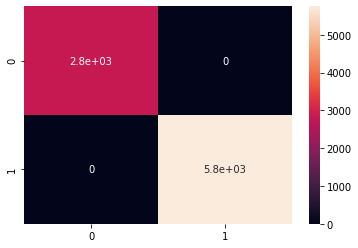

In [19]:
fpr,tpr,_=roc_curve(test,pred_Tpot)
roc_auc = auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve IoT Botnet with Tpot')
plt.show()

cf_matrix = confusion_matrix(test, pred_Tpot)
sns.heatmap(cf_matrix, annot=True)


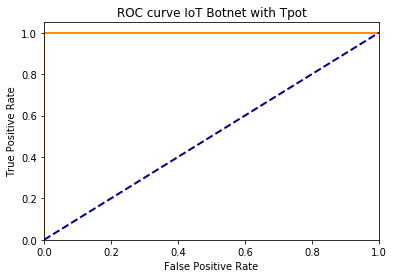

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa30c47cd50&gt;

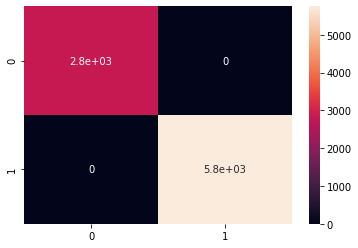

In [21]:
fpr,tpr,_=roc_curve(test,pred_H2O)
roc_auc = auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve IoT Botnet with H2O')
plt.show()

cf_matrix = confusion_matrix(test, pred_H2O)
sns.heatmap(cf_matrix, annot=True)

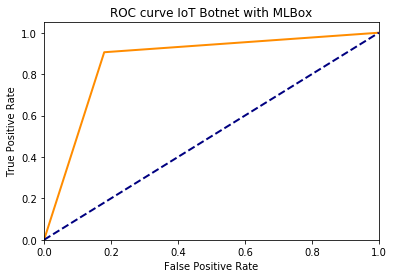

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa307515f90&gt;

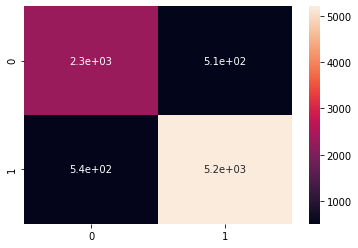

In [22]:
fpr,tpr,_=roc_curve(test,pred_MLBox)
roc_auc = auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve IoT Botnet with MLBox')
plt.show()

cf_matrix = confusion_matrix(test, pred_MLBox)
sns.heatmap(cf_matrix, annot=True)

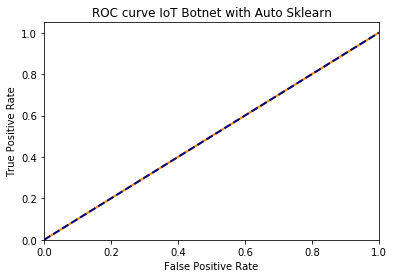

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fa3074ad550&gt;

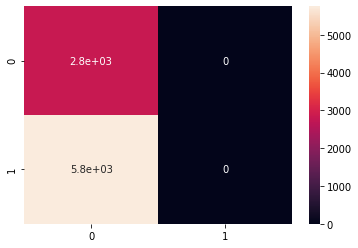

In [23]:
fpr,tpr,_=roc_curve(test,pred_sklearn)
roc_auc = auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC curve(area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve IoT Botnet with Auto Sklearn')
plt.show()

cf_matrix = confusion_matrix(test, pred_sklearn)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
models = pd.DataFrame({
    'Model': ['ML Box', 'Tpot', 'H2O', 
              'Sklearn'],
    'Score': [acc_MLBox, acc_Tpot, acc_H2O, 
              acc_Sklearn]})
models.sort_values(by='Score', ascending=False)
